In [15]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
# Function to simplify retrieval of data from crowdTangle API

def get_from_api(endpoint: str):
    # Set up request url and headers
    api_url = "https://api.crowdtangle.com/"
    api_key = "rXhdMvkhcnae7yjnRPh3Oscn8e0aBP5HVkFmi4qK"
    headers = {"x-api-token": api_key}
    response = requests.get(f"{api_url}/{endpoint}", headers=headers)
    data = response.json()
    if (data["status"] == 200):
        result = data["result"]
        return result
    else:
        raise Exception("Failed to retrieve data")

In [4]:
# Get the list of all publications
list_result = get_from_api("lists")
sph_list_id = next((item["id"] for item in list_result["lists"] if item["title"] == "SPH"), None)

# Get SPH publications
sph_publications = get_from_api(f"lists/{sph_list_id}/accounts")["accounts"]
sph_publications_df = pd.DataFrame(sph_publications)


In [5]:
number_of_sph_publications = sph_publications_df.shape[0]
print("Number of Publications managed by SPH:", number_of_sph_publications)


Number of Publications managed by SPH: 5


In [10]:
# THe publications and the details
print("Number of Publications managed by SPH:", sph_publications_df.shape[0])
sph_publications_df


Number of Publications managed by SPH: 5


,id,name,handle,profileImage,subscriberCount,url,platform,platformId,accountType,pageAdminTopCountry,pageDescription,pageCreatedDate,pageCategory,verified
0,1983429,Berita Harian Singapura,BeritaHarianSG,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...,146972,https://www.facebook.com/489801731109245,Facebook,100070338738343,facebook_page,SG,Diterbitkan buat kali pertama pada 1 Julai 195...,2013-07-17 02:43:52,MEDIA_NEWS_COMPANY,True
1,160873,The Business Times,thebusinesstimes,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...,214914,https://www.facebook.com/288031731262011,Facebook,100070141118752,facebook_page,SG,The official page of The Business Times.\nFoll...,2012-02-21 12:58:51,TOPIC_NEWSPAPER,True
2,41691,The Straits Times,TheStraitsTimes,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...,1925666,https://www.facebook.com/129011692114,Facebook,100068315085098,facebook_page,SG,"The Straits Times, launched on July 15, 1845, ...",2009-09-02 05:18:34,NEWS_SITE,True
3,1809063,Tamil Murasu,tamilmurasu,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...,119163,https://www.facebook.com/163335113676864,Facebook,100063861945733,facebook_page,SG,Tamil Murasu (தமிழ் முரசு) is Singapore's lead...,2010-09-25 07:37:25,NEWS_SITE,True
4,315529,Lianhe Zaobao 联合早报,zaobaosg,https://scontent-sea1-1.xx.fbcdn.net/v/t39.308...,586210,https://www.facebook.com/160823460655497,Facebook,100064733404817,facebook_page,SG,以睿智亲和的内容，与你共谈天下事。 浏览： https://zaobao.com.sg,2011-07-09 05:00:08,MEDIA_NEWS_COMPANY,True


C:\Users\Iskco\AppData\Local\Temp\ipykernel_17440\3708156708.py:47: UserWarning: Glyph 32852 (\N{CJK UNIFIED IDEOGRAPH-8054}) missing from current font.
  plt.tight_layout()
C:\Users\Iskco\AppData\Local\Temp\ipykernel_17440\3708156708.py:47: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.tight_layout()
C:\Users\Iskco\AppData\Local\Temp\ipykernel_17440\3708156708.py:47: UserWarning: Glyph 26089 (\N{CJK UNIFIED IDEOGRAPH-65E9}) missing from current font.
  plt.tight_layout()
C:\Users\Iskco\AppData\Local\Temp\ipykernel_17440\3708156708.py:47: UserWarning: Glyph 25253 (\N{CJK UNIFIED IDEOGRAPH-62A5}) missing from current font.
  plt.tight_layout()
C:\Users\Iskco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32852 (\N{CJK UNIFIED IDEOGRAPH-8054}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Iskco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtoo

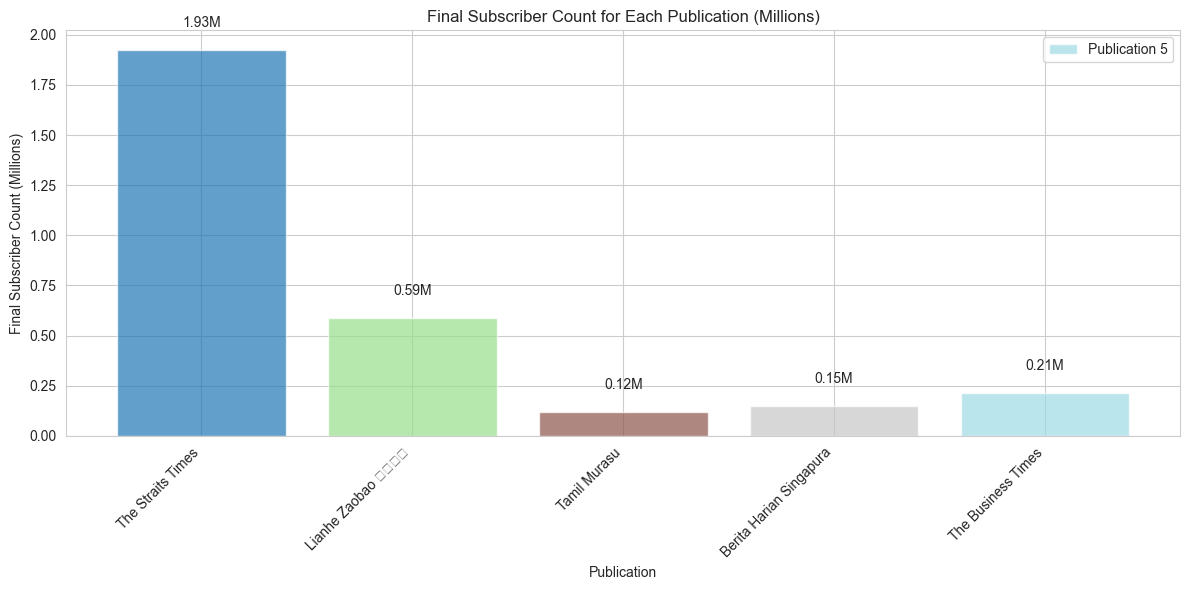

In [88]:
# Extract the ID and name of the publications
data = {
    'account': [
        {'id': 41691, 'name': 'The Straits Times'},
        {'id': 315529, 'name': 'Lianhe Zaobao 联合早报'},
        {'id': 1809063, 'name': 'Tamil Murasu'},
        {'id': 1983429, 'name': 'Berita Harian Singapura'},
        {'id': 160873, 'name': 'The Business Times'},
    ],
    'subscriberData': [
        {'initialCount': 1925716, 'finalCount': 1925716},
        {'initialCount': 586283, 'finalCount': 586283},
        {'initialCount': 119213, 'finalCount': 119213},
        {'initialCount': 147069, 'finalCount': 147069},
        {'initialCount': 214950, 'finalCount': 214950},
    ],
}

# Create a DataFrame from the data
sph_leaderboard_df = pd.DataFrame(data)

# Extract final subscriber counts in millions
final_counts_millions = [count / 1e6 for count in sph_leaderboard_df['subscriberData'].apply(lambda x: x['finalCount'])]

# Extract publication names
publication_names = sph_leaderboard_df['account'].apply(lambda x: x['name'])

# Generate a colormap with as many colors as there are bars
colors = plt.cm.tab20(np.linspace(0, 1, len(publication_names)))

# Create a bar plot for final subscriber counts with different colors for each bar
plt.figure(figsize=(12, 6))
bars = plt.bar(publication_names, final_counts_millions, alpha=0.7, color=colors)
plt.title('Final Subscriber Count for Each Publication (Millions)')
plt.xlabel('Publication')
plt.ylabel('Final Subscriber Count (Millions)')
plt.xticks(rotation=45, ha='right')  # Rotate publication names for better readability

# Display actual numbers on the y-axis
for i, bar in enumerate(bars):
    count = final_counts_millions[i]
    plt.text(bar.get_x() + bar.get_width() / 2, count + 0.1, f'{count:.2f}M', ha='center', va='bottom')

# Add color labels to the legend
for i, bar in enumerate(bars):
    plt.legend([bar], [f'Publication {i + 1}'], loc='upper right')

plt.tight_layout()
plt.show()


C:\Users\Iskco\AppData\Local\Temp\ipykernel_17440\3017133178.py:45: UserWarning: Glyph 32852 (\N{CJK UNIFIED IDEOGRAPH-8054}) missing from current font.
  plt.tight_layout()
C:\Users\Iskco\AppData\Local\Temp\ipykernel_17440\3017133178.py:45: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.tight_layout()
C:\Users\Iskco\AppData\Local\Temp\ipykernel_17440\3017133178.py:45: UserWarning: Glyph 26089 (\N{CJK UNIFIED IDEOGRAPH-65E9}) missing from current font.
  plt.tight_layout()
C:\Users\Iskco\AppData\Local\Temp\ipykernel_17440\3017133178.py:45: UserWarning: Glyph 25253 (\N{CJK UNIFIED IDEOGRAPH-62A5}) missing from current font.
  plt.tight_layout()
C:\Users\Iskco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32852 (\N{CJK UNIFIED IDEOGRAPH-8054}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Iskco\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtoo

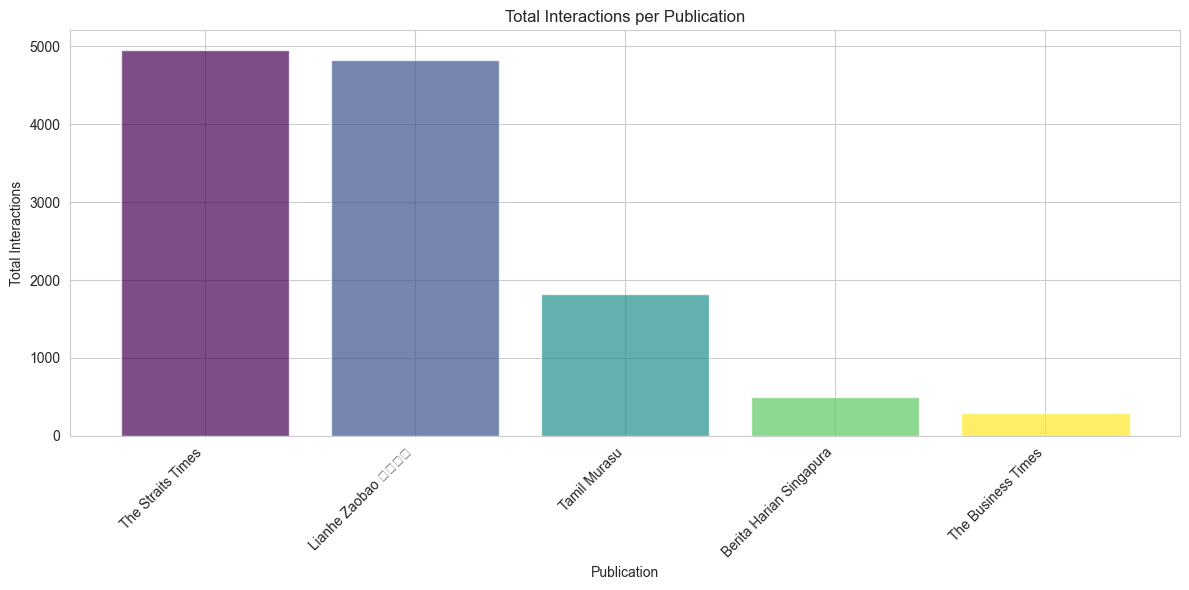

In [78]:
# Extract the ID and name of the publications
data = {
    'account': [
        {'id': 41691, 'name': 'The Straits Times'},
        {'id': 315529, 'name': 'Lianhe Zaobao 联合早报'},
        {'id': 1809063, 'name': 'Tamil Murasu'},
        {'id': 1983429, 'name': 'Berita Harian Singapura'},
        {'id': 160873, 'name': 'The Business Times'},
    ],
    'summary': [
        {'loveCount': 125, 'totalInteractionCount': 4956},
        {'loveCount': 35, 'totalInteractionCount': 4824},
        {'loveCount': 8, 'totalInteractionCount': 1826},
        {'loveCount': 8, 'totalInteractionCount': 496},
        {'loveCount': 1, 'totalInteractionCount': 296},
    ],
}

# Create a DataFrame from the data
sph_leaderboard_df = pd.DataFrame(data)

# Extract total interactions
total_interactions = sph_leaderboard_df['summary'].apply(lambda x: x['totalInteractionCount'])

# Extract publication names
publication_names = sph_leaderboard_df['account'].apply(lambda x: x['name'])

# Generate a colormap with as many colors as there are bars
colors = plt.cm.viridis(np.linspace(0, 1, len(publication_names)))

# Create a bar plot for total interactions with different colors for each bar
plt.figure(figsize=(12, 6))
bars = plt.bar(publication_names, total_interactions, alpha=0.7, color=colors)
plt.title('Total Interactions per Publication')
plt.xlabel('Publication')
plt.ylabel('Total Interactions')
plt.xticks(rotation=45, ha='right')  



plt.tight_layout()
plt.show()
